# Rozwiązanie laboratorium 1

## 1. Implementacje algorytmów wyszukiwania wzorca w tekście

### 1.1 Algorytm naiwny

In [1]:
def naive_pattern_search(pattern, text):
    n = len(text)
    m = len(pattern)
    ans = []
    i = 0
    while i <= n - m:
        last = i
        j = 0
        while j < m and pattern[j] == text[i]:
            i += 1
            j += 1
        if j == m:
            ans.append(i - m + 1)
        i = last + 1

    return ans

### 1.2 Algorytm używający automat skończony

In [2]:
def build_automaton(pattern, alphabet):
    m = len(pattern)
    table = [{} for _ in range(m + 1)]
    for char in alphabet:
        table[0][char] = 0

    table[0][pattern[0]] = 1
    x = 0
    for i in range(1, m):
        for char in alphabet:
            table[i][char] = table[x][char]
        table[i][pattern[i]] = i + 1
        x = table[x][pattern[i]]

    for char in alphabet:
        table[-1][char] = table[x][char]

    return table

In [3]:
def automaton_pattern_search(pattern, text, alphabet):
    m = len(pattern)
    table = build_automaton(pattern, alphabet)
    ans = []
    i = 0
    for j in range(len(text)):
        i = table[i][text[j]]
        if i == m:
            ans.append(j - m + 1)
    return ans


### 1.3 KMP

In [4]:
def build_kmp_table(pattern):
    m = len(pattern)
    pi = [0 for _ in range(m)]
    k = 0
    for i in range(1, m):
        while k > 0 and pattern[i] != pattern[k]:
            k = pi[k-1]
        if pattern[i] == pattern[k]:
            k += 1
        pi[i] = k
    return pi


In [5]:
def kmp(pattern, text):
    m = len(pattern)
    pi = build_kmp_table(pattern)
    ans = []
    i = 0
    j = 0
    while j < len(text):
        while i > 0 and pattern[i] != text[j]:
            i = pi[i - 1]
        if pattern[i] == text[j]:
            i += 1
        if i == m:
            ans.append(j - m + 1)
            i = pi[-1]
        j += 1
    return ans

## 2. Porównanie szybkości algorytmów

### Funkcja generująca testy

In [6]:
from random import randrange
from time import time

text_sizes = [100, 1000, 10000, 100000, 1000000]
pattern_sizes = [1, 2, 500, 5000, 10000]
alphabet_sizes = [2, 3, 26, 100, 1000]


def generate_test(pattern_length, text_length, alphabet_size=2):
    alphabet = [i for i in range(alphabet_size)]
    pattern = [randrange(alphabet_size) for _ in range(pattern_length)]
    text = [randrange(alphabet_size) for _ in range(text_length)]
    return pattern, text, alphabet

### Porównanie czasu pre-processingu kmp i automatu

In [7]:
def compare_pre_processing():
    for text in text_sizes:
        for pattern in pattern_sizes:
            if pattern < text:
                for alph_size in alphabet_sizes:
                    p, _, a = generate_test(pattern, text, alph_size)
                    print("Długość wzorca: ", pattern)
                    print("Rozmiar alfabetu: ", alph_size)
                    t = time()
                    build_automaton(p, a)
                    print(f'Czas pre-processingu automatu: {time() - t: .2f}')
                    t = time()
                    build_kmp_table(p)
                    print(f'Czas pre-processingu KMP: {time() - t: .2f}')
                    print()

In [142]:
compare_pre_processing()

Długość wzorca:  1
Rozmiar alfabetu:  2
Czas pre-processingu automatu:  0.00
Czas pre-processingu KMP:  0.00

Długość wzorca:  1
Rozmiar alfabetu:  3
Czas pre-processingu automatu:  0.00
Czas pre-processingu KMP:  0.00

Długość wzorca:  1
Rozmiar alfabetu:  26
Czas pre-processingu automatu:  0.00
Czas pre-processingu KMP:  0.00

Długość wzorca:  1
Rozmiar alfabetu:  100
Czas pre-processingu automatu:  0.00
Czas pre-processingu KMP:  0.00

Długość wzorca:  1
Rozmiar alfabetu:  1000
Czas pre-processingu automatu:  0.00
Czas pre-processingu KMP:  0.00

Długość wzorca:  2
Rozmiar alfabetu:  2
Czas pre-processingu automatu:  0.00
Czas pre-processingu KMP:  0.00

Długość wzorca:  2
Rozmiar alfabetu:  3
Czas pre-processingu automatu:  0.00
Czas pre-processingu KMP:  0.00

Długość wzorca:  2
Rozmiar alfabetu:  26
Czas pre-processingu automatu:  0.00
Czas pre-processingu KMP:  0.00

Długość wzorca:  2
Rozmiar alfabetu:  100
Czas pre-processingu automatu:  0.00
Czas pre-processingu KMP:  0.00

D

### Porównanie czasu wyszukiwania wzorca dla wszystkich algorytmów

In [8]:
def compare_speed():
    for text in text_sizes:
        for pattern in pattern_sizes:
            if pattern < text:
                for alph_size in alphabet_sizes:
                    p, txt, a = generate_test(pattern, text, alph_size)
                    print("Długość tekstu: ", text)
                    print("Długość wzorca: ", pattern)
                    print("Rozmiar alfabetu: ", alph_size)
                    t = time()
                    w = len(naive_pattern_search(p, txt))
                    print(f'Naiwny: {time() -t: .2f} liczba wystąpień: {w}')
                    t = time()
                    w = len(automaton_pattern_search(p, txt, a))
                    print(f'Automat: {time() -t: .2f} liczba wystąpień: {w}')
                    t = time()
                    w = len(kmp(p, txt))
                    print(f'KMP: {time() -t: .2f} liczba wystąpień: {w}')
                    print()

In [156]:
compare_speed()

Długość tekstu:  100
Długość wzorca:  1
Rozmiar alfabetu:  2
Naiwny:  0.00 liczba wystąpień: 45
Automat:  0.00 liczba wystąpień: 45
KMP:  0.00 liczba wystąpień: 45

Długość tekstu:  100
Długość wzorca:  1
Rozmiar alfabetu:  3
Naiwny:  0.00 liczba wystąpień: 36
Automat:  0.00 liczba wystąpień: 36
KMP:  0.00 liczba wystąpień: 36

Długość tekstu:  100
Długość wzorca:  1
Rozmiar alfabetu:  26
Naiwny:  0.00 liczba wystąpień: 3
Automat:  0.00 liczba wystąpień: 3
KMP:  0.00 liczba wystąpień: 3

Długość tekstu:  100
Długość wzorca:  1
Rozmiar alfabetu:  100
Naiwny:  0.00 liczba wystąpień: 1
Automat:  0.00 liczba wystąpień: 1
KMP:  0.00 liczba wystąpień: 1

Długość tekstu:  100
Długość wzorca:  1
Rozmiar alfabetu:  1000
Naiwny:  0.00 liczba wystąpień: 0
Automat:  0.00 liczba wystąpień: 0
KMP:  0.00 liczba wystąpień: 0

Długość tekstu:  100
Długość wzorca:  2
Rozmiar alfabetu:  2
Naiwny:  0.00 liczba wystąpień: 34
Automat:  0.00 liczba wystąpień: 34
KMP:  0.00 liczba wystąpień: 34

Długość tekst

## 3. Pan Tadeusz

In [9]:
with open("pan-tadeusz.txt", 'r', encoding='UTF-8') as file:
    mr_tadeusz = file.read().lower() # Żeby także liczyć "Pan" i "Pani"

all_characters = set()
for c in mr_tadeusz:
    if c not in all_characters:
        all_characters.add(c)

print("Liczba słów 'pan'")
print("KMP: ", len(kmp("pan", mr_tadeusz)))
print("Naiwny: ", len(naive_pattern_search("pan", mr_tadeusz)))
print("Automat: ", len(automaton_pattern_search("pan", mr_tadeusz, list(all_characters))))

print()
print("Liczba słów 'pani'")
print("KMP: ", len(kmp("pani", mr_tadeusz)))
print("Naiwny: ", len(naive_pattern_search("pani", mr_tadeusz)))
print("Automat: ", len(automaton_pattern_search("pani", mr_tadeusz, list(all_characters))))

Liczba słów 'pan'
KMP:  525
Naiwny:  525
Automat:  525

Liczba słów 'pani'
KMP:  138
Naiwny:  138
Automat:  138


## 4. Pomiary czasu

In [14]:
maks_naive = 0
min_naive = 1000
average_naive = 0

maks_kmp = 0
min_kmp = 1000
average_kmp = 0

maks_automat = 0
min_automat = 1000
average_automat = 0



for _ in range(50):
    ti = time()
    naive_pattern_search("pan", mr_tadeusz)
    ti = time() - ti
    maks_naive = max(maks_naive, ti)
    min_naive = min(min_naive, ti)
    average_naive += ti

    ti = time()
    kmp("pan", mr_tadeusz)
    ti = time() - ti
    maks_kmp = max(maks_kmp, ti)
    min_kmp = min(min_kmp, ti)
    average_kmp += ti

    ti = time()
    automaton_pattern_search("pan", mr_tadeusz, list(all_characters))
    ti = time() - ti
    maks_automat = max(maks_automat, ti)
    min_automat = min(min_automat, ti)
    average_automat += ti

average_naive /= 50
average_kmp /= 50
average_automat /= 50


In [15]:
print("Minimalny czas wyszukiwania")
print(f'Naiwny: {min_naive: .2f}')
print(f'KMP: {min_kmp: .2f}')
print(f'Automat: {min_automat: .2f}')
print()
print("Maksymalny czas wyszukiwania")
print(f'Naiwny: {maks_naive: .2f}')
print(f'KMP: {maks_kmp: .2f}')
print(f'Automat: {maks_automat: .2f}')
print()
print("Średni czas wyszukiwania")
print(f'Naiwny: {average_naive: .2f}')
print(f'KMP: {average_kmp: .2f}')
print(f'Automat: {average_automat: .2f}')

Minimalny czas wyszukiwania
Naiwny:  0.10
KMP:  0.10
Automat:  0.05

Maksymalny czas wyszukiwania
Naiwny:  0.37
KMP:  0.34
Automat:  0.25

Średni czas wyszukiwania
Naiwny:  0.13
KMP:  0.15
Automat:  0.07


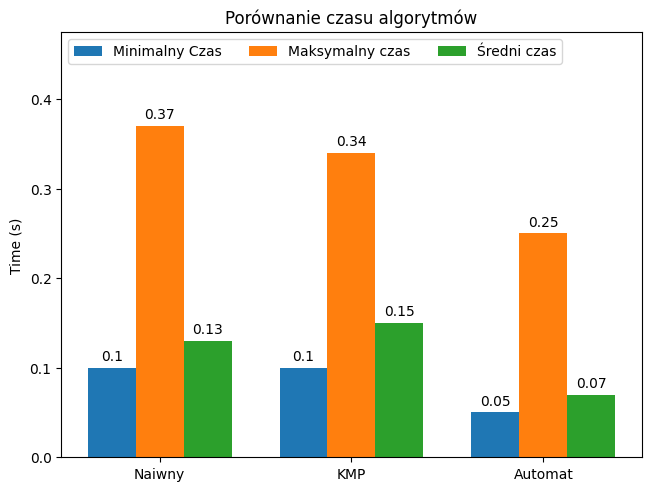

In [26]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ("Naiwny", "KMP", "Automat")
results = {
    'Minimalny Czas': np.round(np.array([min_naive, min_kmp, min_automat]), 2),
    'Maksymalny czas': np.round(np.array([maks_naive, maks_kmp, maks_automat]), 2),
    'Średni czas': np.round(np.array([average_naive, average_kmp, average_automat]), 2),
}

labels = np.arange(len(algorithms))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(labels + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Time (s)')
ax.set_title('Porównanie czasu algorytmów')
ax.set_xticks(labels + width, algorithms)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, max(maks_kmp, maks_naive, maks_automat)*1.3)

plt.show()

## 5. Specjalny case

Wzorzec jest to string który ma najpierw 1000 liter 'a', a na końcu 'b'
Tekst jest to konkatenacja 100 stringów które mają 999 liter 'a', a na końcu 'b', i jeszcze prawdziwy wzorzec na końcu

In [25]:
special_pattern = "".join(["a"]*1000 + ["b"])
base_case_for_text = "".join(["a"]*999 + ["b"])
special_text = "".join([base_case_for_text for _ in range(100)] + [special_pattern])
t = time()
print("Naiwny")
print(naive_pattern_search(special_pattern, special_text))
print(f"Czas: {time() - t:.2f}")
t = time()
print("KMP")
print(kmp(special_pattern, special_text))
print(f"Czas: {time() - t:.2f}")
print()
t = time()
print("Automat")
print(automaton_pattern_search(special_pattern, special_text, ['a', 'b']))
print(f"Czas: {time() - t:.2f}")
print()


Naiwny
[100001]
Czas: 9.49
KMP
[100000]
Czas: 0.06

Automat
[100000]
Czas: 0.01



## 6. Wnioski

Algorytm naiwny:
Bardzo prosty implementacyjnie, w implementacji wprowadziłem heurystykę przy porównywaniu. Gdy było widać,
że pewien substring nie może być już wzorcem kończyłem pętle. Widać, że dzięki temu na losowo wygenerowanych testach taki algorytm działa bardzo dobrze
pomimo swojej złożoności obliczeniowej. Gdy użyłem implementacji tego algorytmu z użyciem slicingu, testy z tekstem długości stu tysięcy trwał nawet 30s.
Jednak przykład z punktu 5 pokazuje, że dalej może się zepsuć. Ten algorytm jest też bardzo dobry przy krótkich wzorcach. W momencie gdy po prostu potrzebujemy
wyszukać jakiś wzorzec w tekście i wiemy, że nie ma on jakieś bardzo dziwnej struktury ten algorytm sprawdza się wystarczająco dobrze, a w jego implementacji
praktycznie nie da się pomylić.

Algorytm KMP:
Jest to jedyny z trzech algorytmów, który działa liniowo w stosunku do wprowadzonych danych i nie zależy wgl od alfabetu. Jest znacząco bardziej skomplikowany
od naiwnego. W prostych przypadkach nie działa dużo lepiej niż naiwny, lecz nie da się go 'zepsuć'.

Automat:
Dużo zależy od pre-processingu. Nie opłaca się go używać, gdy mamy duży alfabet, lecz w przypadku małych alfabetów jest zdecydowanie najlepszy.
Przygotowanie automatu nie jest dużo dłuższe niż przygotowanie tablicy pi do KMP. Lecz po przygotowaniu automatu dla wzorca, można go użyć do przeszukiwania
dowolnego tekstu, a samo przeszukiwanie jest bardzo szybkie. W głównej pętli wykonuje się zazwyczaj dwie operacje. W głównej pętli KMP wykonuje się także wewnętrzna pętla,
i w testach z punktu 2 można wyciągnąć wnioski, że stała przy przeszukiwaniu tekstu jest w algorytmie KMP około 2 lub 3 razy większa niż przy automacie